<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workflow-for-tumor-subtypes-classification-using-machine-learning" data-toc-modified-id="Workflow-for-tumor-subtypes-classification-using-machine-learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Workflow for tumor subtypes classification using machine learning</a></span></li><li><span><a href="#Loading-the-dataset" data-toc-modified-id="Loading-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the dataset</a></span></li><li><span><a href="#Visualize-spectrum" data-toc-modified-id="Visualize-spectrum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize spectrum</a></span></li><li><span><a href="#Split-the-dataset-into-training-and-test-set" data-toc-modified-id="Split-the-dataset-into-training-and-test-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Split the dataset into training and test set</a></span></li><li><span><a href="#Linear-Discriminant-Analysis-(LDA)" data-toc-modified-id="Linear-Discriminant-Analysis-(LDA)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linear Discriminant Analysis (LDA)</a></span></li><li><span><a href="#Support-Vector-Machine-(SVM)" data-toc-modified-id="Support-Vector-Machine-(SVM)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Support Vector Machine (SVM)</a></span></li><li><span><a href="#Gradient-boosting-tree" data-toc-modified-id="Gradient-boosting-tree-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gradient boosting tree</a></span></li><li><span><a href="#Convolutional-neural-network" data-toc-modified-id="Convolutional-neural-network-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Convolutional neural network</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Model-interpretations" data-toc-modified-id="Model-interpretations-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model interpretations</a></span></li></ul></div>

## Workflow for tumor subtypes classification using machine learning
<br>
<font size="3"> <font>

This notebook will walk you through how to build and evaluate various machine learning models for classification tasks. For the demonstration, we will use the annotated imaging mass spectrometry (IMS) dataset from a cancer tissue microarray (TMA) for tumor subtyping of __adenocarcinoma__ (AD) versus __squamous cell carcinoma__ (SQ).

## Loading the dataset 
<br>
<font size="3"> <font>

- how to load


In [2]:
import pandas as pd
import numpy as np

ADSQ_df = pd.read_pickle('data/ADSQ_df.pkl')
ADSQ_df.head(5)

,type,519.08,519.16,519.25,519.33,519.41,519.5,519.58,519.66,519.74,...,4958.85,4959.1,4959.34,4959.58,4959.82,4960.07,4960.31,4960.55,4960.8,4961.04
0,AD,0.000057,0.000061,0.000022,0.000016,0.000020,0.000006,0.000007,0.000000,0.000056,...,0.000016,0.000009,0.000004,0.000005,0.000005,0.000011,0.000020,2.617661e-05,0.000027,0.000013
1,AD,0.000079,0.000073,0.000047,0.000019,0.000011,0.000024,0.000020,0.000024,0.000021,...,0.000019,0.000003,0.000016,0.000007,0.000019,0.000031,0.000006,1.539961e-05,0.000003,0.000007
2,SQ,0.000084,0.000084,0.000047,0.000029,0.000042,0.000025,0.000045,0.000000,0.000000,...,0.000018,0.000026,0.000011,0.000022,0.000022,0.000005,0.000003,7.241437e-06,0.000022,0.000009
3,AD,0.000033,0.000108,0.000282,0.000117,0.000124,0.000061,0.000025,0.000013,0.000000,...,0.000035,0.000025,0.000011,0.000014,0.000016,0.000019,0.000010,7.514679e-07,0.000018,0.000032
4,SQ,0.000218,0.000126,0.000035,0.000076,0.000018,0.000021,0.000012,0.000017,0.000000,...,0.000005,0.000004,0.000022,0.000021,0.000012,0.000002,0.000008,1.318835e-05,0.000017,0.000014


## Visualize spectrum


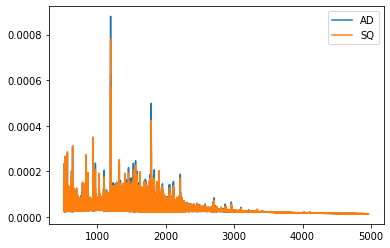

In [3]:
#visualize average spectrum
import matplotlib.pyplot as plt

plt.plot(ADSQ_df.columns[1:],ADSQ_df[ADSQ_df['type']=='AD'].mean(0),label='AD') # replace second argument to be feature importance
plt.plot(ADSQ_df.columns[1:],ADSQ_df[ADSQ_df['type']=='SQ'].mean(0),label='SQ')
plt.legend()

## Split the dataset into training and test set 

In [3]:
#split the dataset into training and test set

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(ADSQ_df.drop('type',1).values, 
                                                    ADSQ_df['type'], test_size=0.3,
                                                    random_state=19)
# Change y_test to take on binary values 0 and 1 for the purposes of printing ROC curve
new_y_test = y_test.copy()
binary = new_y_test.replace({'AD' : 0, 'SQ' : 1})

## Linear Discriminant Analysis (LDA)
<br>
<font size="3"> <font>

   Train a simple linear discriminant model for the classification task and evaluate the model performance on the test set.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd',n_components=1)
lda.fit(X_train,y_train)
y_pred_lda = lda.predict(X_test)
report_dict_lda = classification_report(y_test, y_pred_lda, output_dict=True)
conf_mtx_lda = confusion_matrix(y_test, y_pred_lda)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


 <font size="3"> <font>

 Print the model performance on the test set and plot the confusion matrix


[[743  62]
 [162 435]]
Model achieved accuracy: 0.84, recall: 0.84, f1: 0.838 on the test set 


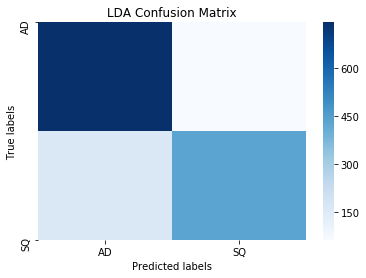

In [116]:
import seaborn as sns
print(conf_mtx_lda)
print('Model achieved accuracy: {}, recall: {}, f1: {} on the test set '
      .format(round(report_dict_lda['accuracy'],3),
              round(report_dict_lda['weighted avg']['recall'],3),
              round(report_dict_lda['weighted avg']['f1-score'],3)))
ax= plt.subplot()
sns.heatmap(conf_mtx_lda, ax = ax, fmt='d', cmap='Blues');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('LDA Confusion Matrix'); 
ax.xaxis.set_ticklabels(['AD', 'SQ']); ax.yaxis.set_ticklabels(['AD', 'SQ']);

<font size="3"> <font>
    __Note:__ The model performance on the test set is decent for a simple linear model, considering the complicated nature of the data e.g. noise and high-dimensionality. There's definitely room for improvement by training models with higher complexity.
 

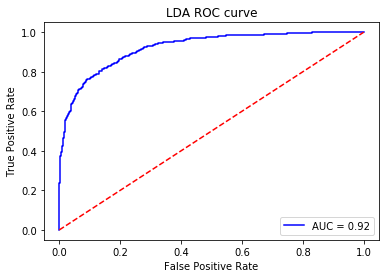

In [113]:
scores = lda.predict_proba(X_test)[:,1]
binary = new_y_test.replace({'AD' : 0, 'SQ' : 1})
fpr, tpr, threshold = metrics.roc_curve(binary, scores)
roc_auc = metrics.auc(fpr, tpr)
plt.title('LDA ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient boosting tree


In [4]:
# Gradient boosting tree
import xgboost
xgb = xgboost.XGBClassifier(learning_rate=0.1, n_estimators=600, objective='binary:logistic',subsample=1,
                            reg_alpha=0,min_child_weight=5,max_depth=4,gamma=0,colsample_bytree=1,nthread = 8)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)


prob_xgb = xgb.predict_proba(X_test)
report_dict_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
conf_mtx_xgb = confusion_matrix(y_test, y_pred_xgb)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

print(conf_mtx_xgb)
print('Model achieved accuracy: {}, recall: {}, f1: {} on the test set '.format(round(report_dict_xgb['accuracy'],3),
                                                                               round(report_dict_xgb['weighted avg']['recall'],3),
                                                                              round(report_dict_xgb['weighted avg']['f1-score'],3)))

# Now visualize the confusion matrix
ax = plt.subplot()
sns.heatmap(conf_mtx_xgb, ax = ax, fmt='d', cmap='Blues');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GB Confusion Matrix'); 
ax.xaxis.set_ticklabels(['AD', 'SQ']); ax.yaxis.set_ticklabels(['AD', 'SQ']);

# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

[[770  35]
 [ 89 508]]
Model achieved accuracy: 0.912, recall: 0.912, f1: 0.911 on the test set 


In [11]:
# implement dense layers

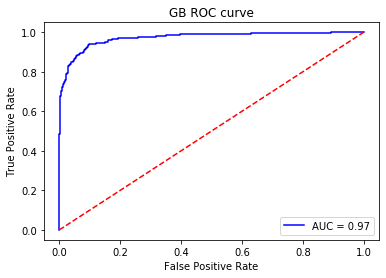

In [112]:
# ROC curve
scores = prob_xgb[:,1]
fpr, tpr, threshold = metrics.roc_curve(binary, scores)
roc_auc = metrics.auc(fpr, tpr)
plt.title('GB ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,
                                  bootstrap = True,
                                  max_features = 'sqrt')
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:,1]
report_dict_rf = classification_report(y_test, rf_predictions, output_dict=True)
conf_mtx_rf = confusion_matrix(y_test, rf_predictions)

[[784  21]
 [254 343]]
Model achieved accuracy: 0.804, recall: 0.804, f1: 0.792 on the test set 


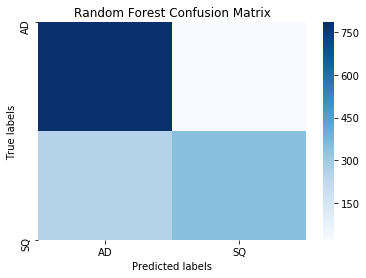

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Calculate roc auc
print(conf_mtx_rf)

print('Model achieved accuracy: {}, recall: {}, f1: {} on the test set '.format(round(report_dict_rf['accuracy'],3),
                                                                               round(report_dict_rf['weighted avg']['recall'],3),
                                                                              round(report_dict_rf['weighted avg']['f1-score'],3)))

# Now visualize the confusion matrix
ax = plt.subplot()
sns.heatmap(conf_mtx_rf, ax=ax, fmt='g', cmap='Blues');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(['AD', 'SQ']); ax.yaxis.set_ticklabels(['AD', 'SQ']);
plt.show()


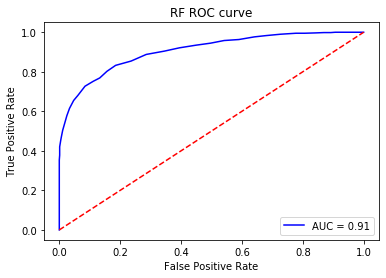

In [111]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(binary, rf_probs)
roc_auc = metrics.auc(fpr, tpr)
plt.title('RF ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model evaluation

## Model interpretations

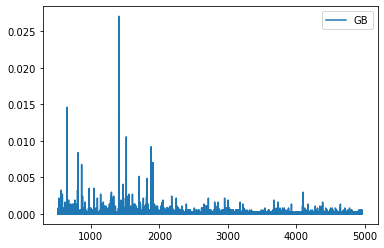

In [8]:
#plt.plot(ADSQ_df.columns[1:], lda.coef_[0,:], label='LDA') # replace second argument to be feature importance
plt.plot(ADSQ_df.columns[1:], xgb.feature_importances_, label='GB')
plt.legend()

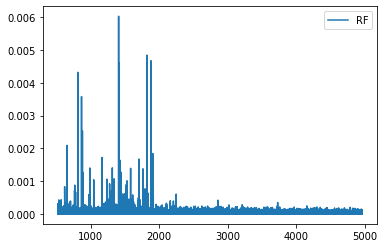

In [9]:
plt.plot(ADSQ_df.columns[1:], rf_model.feature_importances_, label='RF')
plt.legend()

# Support Vector Machine

In [ ]:
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# import support vector classifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train the svm model
svm_model = SVC(kernel='rbf', C=0.000001)
svm_model.fit(X_train, y_train)

# Now use model to predict and evaluate the accuracy
y_pred_svm = svm_model.predict(X_test)
report_dict_svm = classification_report(y_test, y_pred_svm)
conf_mtx_svm = confusion_matrix(y_test, y_pred_svm)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(conf_mtx_svm)
print(report_dict_svm)

# Now visualize the confusion matrix
ax = plt.subplot()
sns.heatmap(conf_mtx_svm, annot=True, ax = ax, fmt='d');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['AD', 'SQ']); ax.yaxis.set_ticklabels(['AD', 'SQ']);